<a href="https://colab.research.google.com/github/A01793509/Equipo38/blob/main/Arboldedecision_Equipo38f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Alberto Jose Garcia Porras (A01793509)
*   Carlos Julio León Caicedo (A01793947)
*   Luis Fernando Ríos Piedra (A00453954)
*   Marco Antonio Vázquez Morales (A01793704)



En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [2]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, zipfile
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer,classification_report
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from io import BytesIO

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.ensemble import BalancedRandomForestClassifier

#**Contexto del problema y el conjunto de datos a utilizar**

Al asignar un crédito sabemos que conlleva un riesgo para el prestamista en caso de que el deudor no pague al final la cantidad asignada, o inclusive el equivocarnos al negarle el préstamo a alguien que sí era confiable.

Con base a datos históricos, el objetivo es predecir si una persona es clasificada como confiable a la asignación de un crédito, o no lo es.

Para ello se utilizará el conjunto de datos crediticios del sur de Alemania, el cual contiene 1000 registros y 21 columnas o atributos que serán utilizados en los siguientes ejercicios a continuación **para predecir si una persona es confiable o no para la asignación de un crédito**.

#**Ejercicio-1.** 

Se cargan los datos del **[conjunto de datos crediticios del sur de Alemania](https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip)** y se sustituyen los nombres de las columnas del idioma Alemán a Inglés de acuerdo a como se indica en la página de la UCI.

In [3]:
#Lectura del archivo desde la fuente UCI original
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'


base_datos = path.split('/')[-1]

req_path = requests.get(path)


archivo_uci= zipfile.ZipFile(BytesIO(req_path.content))
archivo_uci.extractall('/content/sample_data/SouthGermanCredit')
df = pd.read_csv("/content/sample_data/SouthGermanCredit/SouthGermanCredit.asc",sep=' ')

df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [4]:
#Una vez cargados los datos en nuestro dataframe, procedemos a cambiar el nombre de las columnas realizando la traducción respectiva de acuerdo a lo indicado 
#en la descripción del dataset. En este caso asignaremos a la lista 'cols_ingles' el nombre que queremos darle a cada columna en el respectivo orden.
cols_ingles = ["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex", 
               "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", 
               "telephone", "foreign_worker", "credit_risk"]


#Renombramos las columnas asignando la lista con los nombres a la propiedad columns del dataframe
df.columns=cols_ingles


df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

Se realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba del 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Se define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida.

In [5]:
#Definimos los atributos de entrada como 'X' y a la variable de salida como 'Y'
X=df.drop('credit_risk',axis=1)

Y=df['credit_risk']


In [6]:
#Particionamos nuestros datos en conjunto de entrenamiento y conjunto de pruebas, ya que no requerimos validación debido al método de validación cruzada que
#utilizaremos. El conjunto de entrenamiento corresponderá al 85% de los datos.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.85)

Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 625 to 628
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   850 non-null    int64
 1   duration                 850 non-null    int64
 2   credit_history           850 non-null    int64
 3   purpose                  850 non-null    int64
 4   amount                   850 non-null    int64
 5   savings                  850 non-null    int64
 6   employment_duration      850 non-null    int64
 7   installment_rate         850 non-null    int64
 8   personal_status_sex      850 non-null    int64
 9   other_debtors            850 non-null    int64
 10  present_residence        850 non-null    int64
 11  property                 850 non-null    int64
 12  age                      850 non-null    int64
 13  other_installment_plans  850 non-null    int64
 14  housing                  850 non-null    int64
 15  numb

#**Ejercicio-3.**

Se realizan un Pipeline que incluye las siguientes transformaciones para generar los primeros modelos:

1. Imputación de todas las variables de entrada, diferenciando entre el tipo de cada variable.
2. Análisis de las variables numéricas (cuantitativas) de entrada y transformación para escalar a todas ellas en un rango equiparable.
3. Aplicación de la transformación One-Hot encoding a las variables de entrada de tipo categórico y binario.

In [7]:
#**********************************************************************************************************************************************************************
#Creamos los pipelines para la imputación, la transformación (escalar) de las variables numéricas y para la transformación One-hot de las variables
#categóricas y binarias:
#**********************************************************************************************************************************************************************
#Almacenamos las variables numéricas en una lista para mayor facilidad en su uso
XNumericas=["age", "amount", "duration"]
#Creamos el pipeline para las numéricas con la imputación utilizando la media y el minmax para escalar los datos numéricos a un rango equiparable
pipeline_numericas = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')),('scalar', MinMaxScaler(feature_range=(1,2)))])


#Almacenamos las variables categóricas y ordinales en una lista para mayor facilidad en su uso
XCategoricas=["status","credit_history", "purpose", "savings", "personal_status_sex", "other_debtors",
                                                               "other_installment_plans", "housing"]
#Creamos el pipeline para las categóricas con la imputación utilizando la moda y aplicando la transformación One-Hot
pipeline_categoricas = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])

#Almacenamos las variables binarias en una lista para mayor facilidad en su uso
XBinarias = ["people_liable", "telephone", "foreign_worker"]
#Creamos el pipeline para las categóricas con la imputación utilizando la moda y aplicando la transformación One-Hot
pipeline_binarias = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])


##Analísis y Conclusiones
**Justificación de los tipos de imputación realizado en cada caso:**

*   Para el caso de las variables numéricas se evidenció que con el metodo `df.info()` se muestra que no se requeria la imputación dado que no había datos perdidos, nulos o vacios, pero se puede utilizar cómo estrategia de imputación la media, la cual es recomendada para valores númericos.
*   La imputación de las variables se realiza con la finalidad de tener datos mejor tratados, que eviten que las varianzas sean muy grandes o que los estimadores estes demasiado sesgados. Especificamente usamos medias en el caso de las variables númericas para preservar el valor medio de la variable, toda vez que la imputación no fue estratificada por grupos de edad que hubiese requerido una media condicionada.
*   Analizando los datos con el metodo `df[XNumericas].describe()`, se observó que las escalas son muy diferentes. La  variable "age", el **mínimo es 19 y máximo 75**, mientras que para "amount" el **mínimo es 250 y el máximo 18.424** y la variable "duration" tiene un **mínimo de 4 y un máximo de 72**. Por lo anterior se tuvo que escalar los datos, ya que sus rangos son muy diferentes entre uno y otro, y esto podría afectar el desempeño del modelo.

**Justificación del porque a las variables binarias se les debe aplicar One-Hot Enconding:**

*  Para las variables categorícas y binarias utilizamos la moda. Lo anterior debido a que tienen una mayor probabilidad de ocurrencia de los datos.
*  Se aplicó el **One-Hot Enconding** para estandarizar a valores de 0 a 1 tanto las variables categorícas y binarias, dado que estas originalmente contenian valores de 1 y 2, lo cual podría afectar el desempeño del modelo. 


La imputación de las variables se realiza con la finalidad de tener datos mejor tratados, que eviten de las varianzas sean muy grandes o que los estimadores estes demasiado sesgados, para fines estadísticos se requiere generar inferencias validas. 

Especificamente usamos medias en el caso de las variables númericas en primer por ser número y para preservar el valor medio de la variable, toda vez que la imputación no fue condicionada por grupos de edad. 

En la variable de las categorías y binarias usamos la moda, por ser un mejor indicador de que categoría es el que más se repite en nuestro conjunto de datos.

One-Hot Encoding esta diseñado para convertir datos categóricos (0/False - 1/True) a datos numéricos en términos binarios de manera que los presentan un mejor rendimiento al momento de procesar los datos.

In [8]:
#Establecemos a "Columnas_Transformar" como la variable para transformar todas las columnas definidas en el punto anterior, llamando los pipeline creados previamente.
Columnas_Transformar = ColumnTransformer(transformers=[('numericas', pipeline_numericas,XNumericas), ('categoricas', pipeline_categoricas, XCategoricas), 
                                                     ('binarias', pipeline_binarias, XBinarias)]) #remainder='passthrough')
#Aplicamos la transformación de las columnas requeridas (numéricas, categóricas y binarias solamente)
#X_train_fit = Columnas_Transformar.fit(Xtrain)
#pd.DataFrame(X_train_fit.transform(Xtrain))

#**Ejercicio-4.**

Se llevó a cabo el entrenamiento de los tres  modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio, de manera conjunta usando un ciclo FOR.

In [ ]:
#Creamos la función obtener_modelos para utilizarla durante el procesamiento de los datos
def obtener_modelos():
  #Creamos las listas en blanco para almacenar los modelos a utilizar y los nombres de cada modelo
  modelos = list()
  nombres = list()

  #Creamos el registro del modelo de regresión logística en las listas modelo y nombres
  modelos.append(LogisticRegression(max_iter=3000))
  nombres.append('LR')

  #Creamos el registro del modelo de árbol de decisión en las listas modelo y nombres
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  #Creamos el registro de Random Forest en las listas modelo y nombres
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  #Devolvemos las listas creadas para el procesamiento respectivo
  return modelos, nombres

In [13]:
#Definimos nuestras funciones de cálculo del score para cada una de las opciones requeridas
#Función para cálculo de accuracy
def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

#Función para cálculo de precisión
def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal,ypred).ravel()
  precision = tp/(tp+fp)
  return precision

#Función para cálculo de recall
def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal,ypred).ravel()
  recall = tp/(tp+fn)
  return recall

#Función para cálculo de f1 score
def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)+fp+fn)
  return f1score

#Función para cálculo de gmean
def mi_gmean(yreal, ypred):
    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    recall = tp/(tp+fn)
    especificidad = tn/(tn+fp)
    gmean=np.sqrt(recall*especificidad)
    return gmean

In [ ]:
#A continuación generamos la validación cruzada para los modelos almacenados en las listas previas e imprimimos las métricas para los
#conjuntos de entrenamiento y validación.

#Se agrega temporalmente para eliminar el warning de división por cero
import warnings
warnings.filterwarnings("ignore")

#Captamos en las variables modelos y nombres, los modelos y descripciones almacenadas en las listas, llamando la función creada previamente.
modelos, nombres = obtener_modelos()

#Creamos una lista en blanco para almacenar el resultado de la iteración
resultados = list()

#Comenzamos a recorrer todos los modelos almacenados en la lista modelos
for i in range(len(modelos)):

  #Definimos los K pliegues que utilizaremos en nuestra validación cruzada, en este caso, 5 divisiones y 3 repeticiones
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  #Creamos nuestro pipeline con los pasos de transformación y ejecución de los modelos
  pipeline = Pipeline(steps=[("ct", Columnas_Transformar), ("m", modelos[i])])

  #Almacenamos las métricas a utilizar en la lista 'mismetricas' y llamamos las funciones de métricas creadas previamente
  mismetricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)

  }

  #Ejecutamos la validación cruzada y almacenamos el resultado en la variable 'resultadosOU'
  resultadosOU = cross_validate(pipeline, Xtrain, Ytrain, scoring=mismetricas, cv=kfold,  
                                return_train_score=True
                                )
  resultados.append(resultadosOU)

  print("Métricas de %s para los datos de entrenamiento:" %nombres[i])
  print("\nmean Accuracy: %.3f \nmean Precision: %.3f \nmean Recall: %.3f \nmean f1score: %.3f \nGmean : %.3f \n" % (
                                               np.mean(resultadosOU["train_accuracy"]),
                                               np.mean(resultadosOU["train_precision"]),
                                               np.mean(resultadosOU["train_recall"]),
                                              np.mean(resultadosOU["train_f1score"]),
                                               np.mean(resultadosOU["train_gmean"])
  ))                  

  print("Métricas de %s para los datos de validación:" %nombres[i])
  print("\nmean Accuracy: %.3f \nmean Precision: %.3f \nmean Recall: %.3f \nmean f1score: %.3f \nGmean : %.3f \n" % (
                                               np.mean(resultadosOU["test_accuracy"]),
                                               np.mean(resultadosOU["test_precision"]),
                                               np.mean(resultadosOU["test_recall"]),
                                               np.mean(resultadosOU["test_f1score"]),
                                               np.mean(resultadosOU["test_gmean"])
  ))                                                    

Métricas de LR para los datos de entrenamiento:

mean Accuracy: 0.780 
mean Precision: 0.805 
mean Recall: 0.908 
mean f1score: 0.854 
Gmean : 0.656 

Métricas de LR para los datos de validación:

mean Accuracy: 0.758 
mean Precision: 0.791 
mean Recall: 0.894 
mean f1score: 0.839 
Gmean : 0.621 

Métricas de DT para los datos de entrenamiento:

mean Accuracy: 1.000 
mean Precision: 1.000 
mean Recall: 1.000 
mean f1score: 1.000 
Gmean : 1.000 

Métricas de DT para los datos de validación:

mean Accuracy: 0.674 
mean Precision: 0.775 
mean Recall: 0.758 
mean f1score: 0.766 
Gmean : 0.597 

Métricas de RF para los datos de entrenamiento:

mean Accuracy: 1.000 
mean Precision: 1.000 
mean Recall: 1.000 
mean f1score: 1.000 
Gmean : 1.000 

Métricas de RF para los datos de validación:

mean Accuracy: 0.747 
mean Precision: 0.784 
mean Recall: 0.884 
mean f1score: 0.831 
Gmean : 0.607 



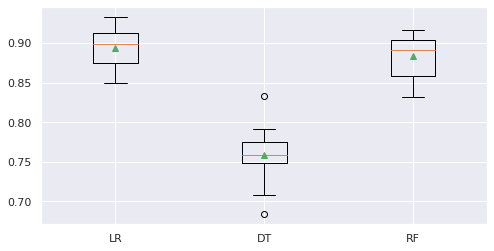

In [ ]:
#Se generan los boxplots de los tres modelos utilizando solo la métrica 'recall'
sns.set(rc={'figure.figsize':(8,4)})
bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bprecall.append(rr)
plt.boxplot(bprecall, labels=nombres, showmeans=True)
plt.show()

##Analísis y Conclusiones

A través de los diagramas de caja y bigote podemos determinar que: 

*   Para la Regresión Logística, el conjunto de datos se encuentra más concentrado y la mediana es mayor a la media.
*   En el decisión tree tiene datos atípicos y hay una mayor dispersión de los datos y el recall explica solamente el 75%, decir que nuestro conjunto de datos se ubica en el tercer cuartil.
*   En RF hay una mayor explicación de la métrica recall con casi el 90%, estamos en el cuarto cuartil  en tanto que los datos son más dispersos y la distribución esta más normalizada.


In [ ]:
def mi_PlotCurvaAprendizaje(ModeloTipo, train_sizes, train_scores, val_scores, TipoImpresion):

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    if TipoImpresion=="Incremental":
      plt.title('Curvas de Aprendizaje incremental')
      plt.xlabel('Tamaño del conjunto de entrenamiento')
    else:
      plt.title('Curvas de Aprendizaje')
      plt.xlabel('Tamaño del conjunto de entrenamiento')

    #Si es Random Forrest utilizamos la métrica recall, para los otros utilizamos la métrica F1 score
    if ModeloTipo=="RF":
      plt.ylabel('recall')
    else:
      plt.ylabel('F1 score')

    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [ ]:
def mi_CurvaAprendizaje(ModeloTipo, ModeloCurva, Xcurva, ycurva, TipoImpresion):

  #Capturamos la curva a graficar
  MiModelo = ModeloCurva

  #Aplicamos la transformación según lo definido previamente
  ColsX = Columnas_Transformar.fit(Xcurva)
  TransX = ColsX.transform(Xcurva)

  #Definimos los K pliegues que utilizaremos en nuestra validación cruzada, en este caso, 5 divisiones y 3 repeticiones
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)


  #Creamos un arreglo con los 20 valores de los tamaños de muestra:
  delta_train_sz = np.linspace(0.1, 1.0, 20)


  #Ejecutamos la función learning curve para capturar las variables tr_sizes, tr_scores y val_scores, que posteriormente utilizaremos en la graficación
  if (ModeloTipo == "LR"):
    #Si el modelo es LR utilizaremos la métrica f1 
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = MiModelo,    
                                                      X = TransX,
                                                      y = ycurva,
                                                      cv = mi_kfold ,
                                                      train_sizes = delta_train_sz ,
                                                      random_state=0,
                                                      scoring=make_scorer(mi_f1score))
  elif (ModeloTipo == "RF"):
    #Si el modelo es LR utilizaremos la métrica recall 
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = MiModelo,    
                                                      X = TransX,
                                                      y = ycurva,
                                                      cv = mi_kfold ,
                                                      train_sizes = delta_train_sz ,
                                                      random_state=0,
                                                      scoring=make_scorer(mi_recall))

  #Enviamos a nuestra función de graficación los valores obtenidos y esperamos que nos genere las curvas de aprendizaje:
  mi_PlotCurvaAprendizaje(ModeloTipo, tr_sizes, tr_scores, val_scores, TipoImpresion)

In [ ]:
def mi_CurvaValidacion(ModeloCurva, Xcurva, ycurva):
  
  #Capturamos la curva a graficar
  MiModelo = ModeloCurva

  #Aplicamos la transformación según lo definido previamente
  ColsX = Columnas_Transformar.fit(Xcurva)
  TransX = ColsX.transform(Xcurva)

  #Definimos los K pliegues que utilizaremos en nuestra validación cruzada, en este caso, 5 divisiones y 3 repeticiones
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

  #Ejecutamos la función validation curve para capturar las variables tr_scores y val_scores, que posteriormente utilizaremos en la graficación
  #Según lo indicado utilizaremos la métrica f1 para el modelo DT 
  tr_scores, val_scores = validation_curve(estimator = MiModelo,    
                                                        X = TransX,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        param_name='max_depth',
                                                        param_range=np.arange(1, 20),
                                                        scoring=make_scorer(mi_f1score))

  #Calculamos las variables requeridas para la graficación

  #Obtenemos la media para las métricas en el conjunto de entrenamiento
  train_mean = np.mean(tr_scores, axis=1)
  #Obtenemos la desviación estandar para las métricas en el conjunto de entrenamiento
  train_std = np.std(tr_scores, axis=1)

  #Obtenemos la media para las métricas en el conjunto de pruebas
  test_mean = np.mean(val_scores, axis=1)
  #Obtenemos la desviación estandar para las métricas en el conjunto de pruebas
  test_std = np.std(val_scores, axis=1)

  #Definimos el rango en el cual graficaremos la curva de validación
  param_range = np.arange(1, 20, 1)

  #Comenzamos la graficación de la curva
  plt.subplots(1, figsize=(7,7))
  plt.plot(param_range, train_mean, label="Training", color="blue")
  plt.plot(param_range, test_mean, label="Validation", color="red")

  plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
  plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

  plt.title("Curva de Validación")
  plt.xlabel("Número de árboles")
  plt.ylabel("F1 Score")
  plt.tight_layout()
  plt.legend(loc="best")
  plt.show()

Curvas de aprendizaje del modelo LR


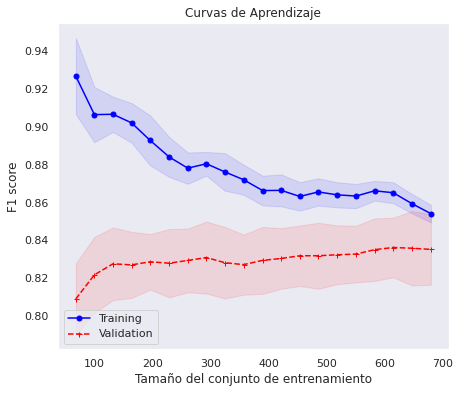

Curvas de validación del modelo DT


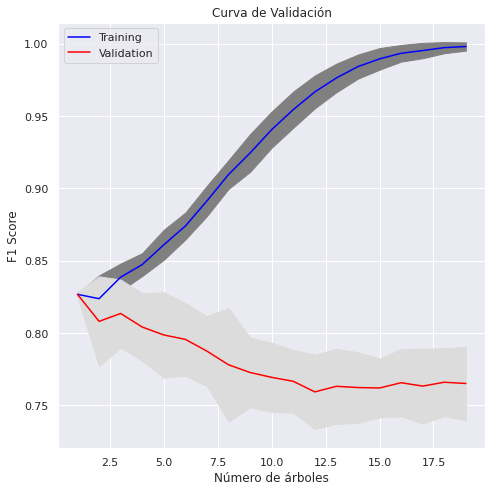

Curvas de aprendizaje del modelo RF


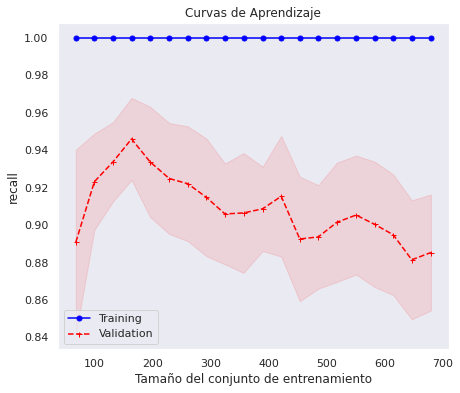

In [ ]:
for i in range(len(modelos)):
  if nombres[i]=="DT":
    print('Curvas de validación del modelo %s'%nombres[i])
    mi_CurvaValidacion(modelos[i], Xtrain, Ytrain)
  else:
    print('Curvas de aprendizaje del modelo %s'%nombres[i])
    mi_CurvaAprendizaje(nombres[i], modelos[i], Xtrain, Ytrain, "Normal")

##Analísis y Conclusiones

*   Para la curva de Regresión Logística, se aprecia conforme el modelo recibe mas datos de entrenamiento la curva va en picada lo que nos da a entender que el modelo no esta mejorando sus predicciones entre cada una de las iteraciones, podemos deducir que el modelo esta subentrenado.
*   Para la curva de validación del modelo Decision Tree, conforme aumenta el numero de arboles aumenta el desempeño para el conjunto de entrenamiento. Sin embargo, para el conjunto de validación ocurre lo contrario lo que nos da a entnder que el modelo esta sobreentrenado. 
*   Para el Random Forest, de la curva de entrenamiento podemos deducir que la respuesta del modelo esta muy sesgada hacia la clase de minoritaria, las predicciones están sesgadas hacia la clase con mayor numero de muestras. Se comporta con una hacia el sobreentrenamiento.

#**Ejercicio-5.**

In [ ]:

#a. REGRESION LOGISTICA -Buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este casodeberás usar la métrica (scoring) “f1-score”
XtrainTf = Columnas_Transformar.fit(Xtrain)
XtrainFTf = XtrainTf.transform(Xtrain)   
XtestFTf = XtrainTf.transform(Xtest)


tom=TomekLinks()
X_res, y_res =tom.fit_resample(XtrainFTf,Ytrain)

modelo_LRf=LogisticRegression(max_iter=1000)


penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,0.9,1.0]
class_weight=[None,'balanced']
solver= ['newton-cg','lbfgs','liblinear','sag','saga']

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid_model_LR = GridSearchCV(modelo_LRf,param_grid={'C':C,'penalty':penalty,'solver':solver,'class_weight':class_weight},cv=cv,scoring='f1')

grid_model_LR.fit(X_res,y_res)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: So

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 0.9, 1.0],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

¿Cuál es la utilidad de la métrica F1-Score?

##Analísis y Conclusiones

*   Estamos trabajando con clases no-balanceadas y la métrica f1-score forzará que el gridsearch nos pase los mejores parámetros en base al mejor resultado de esta métrcia. Dentro del cálculo de f1-score se le resta importancia a la clase mayoritaria por lo que esperaríamos que con los parámetros obtenidos abordemos el "desbalanceo".

In [ ]:
#a. REGRESION LOGISTICA - impresion de la mejor combinación de parámetros
grid_model_LR.best_params_

{'C': 1.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
lrc=grid_model_LR.predict(XtestFTf)
print(classification_report(Ytest,lrc))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.83      0.86      0.85       112

    accuracy                           0.77       150
   macro avg       0.69      0.68      0.68       150
weighted avg       0.76      0.77      0.76       150



In [ ]:
print(classification_report_imbalanced(Ytest,lrc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.54      0.50      0.86      0.52      0.65      0.41        38
          1       0.83      0.86      0.50      0.85      0.65      0.44       112

avg / total       0.76      0.77      0.59      0.76      0.65      0.44       150



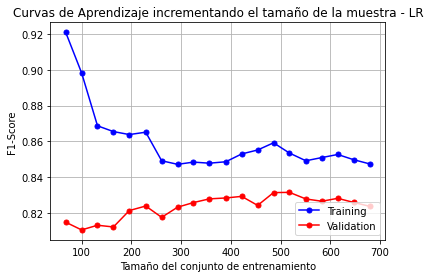

In [ ]:
#b. REGRESIOIN LOGÍSTICA - Curvas de aprendizaje usando los mejoes valores usanod métrica f1-score 


delta_train_sz = np.linspace(.1, 1.0, 20)
LR_grid_res=LogisticRegression(max_iter=1000,C=1.0,penalty='l2',solver='newton-cg',class_weight=None)


tr_sizes,tr_scores, val_scores = learning_curve(LR_grid_res,    
                                                        X = XtrainFTf,
                                                        y = Ytrain,
                                                        cv = cv ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring='f1'
                                                        )

train_mean = np.mean(tr_scores, axis=1)
train_std = np.std(tr_scores, axis=1)
valid_mean = np.mean(val_scores, axis=1)
valid_std = np.std(val_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (F1-Score):
plt.plot(tr_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(tr_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra - LR')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('F1-Score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
#c. DECISION TREE - Buscando los mejores hiperparámetros, debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”.

modelo_DT=DecisionTreeClassifier()

enn=EditedNearestNeighbours()
X_res, y_res =tom.fit_resample(Xtrain,Ytrain)

criterion=["gini", "entropy","log_loss"]
max_depth=np.arange(33,39)
min_samples_split=np.arange(2,5)
class_weight=[None,'balanced']
ccp_alpha=np.round(np.linspace(0,0.1,4),2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

grid_modelo_DT=GridSearchCV(modelo_DT,param_grid={'criterion':criterion,'max_depth':max_depth,
                                                 'min_samples_split':min_samples_split,'class_weight':class_weight,
                                                 'ccp_alpha':ccp_alpha},cv=cv,scoring='precision')

grid_modelo_DT.fit(X_res,y_res)



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.  , 0.03, 0.07, 0.1 ]),
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([33, 34, 35, 36, 37, 38]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='precision')

¿Cuál es la utilidad de la métrica Precision?

##Analísis y Conclusiones

* Es la tasa de predicciones positivas, en este caso como estamos trabajando con clases no balanceadas, esperariamos que con los mejores parámetros obtenidos las predicciones de nuestro modelo se haga cargo de evitar etiquetar como positivo una muestra que en realidad es negativa.

In [ ]:
#c. DECISION TREE - Impresion de los mejor combianción de parámetros
grid_modelo_DT.best_params_

{'ccp_alpha': 0.03,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 33,
 'min_samples_split': 2}

In [ ]:
dtc=grid_modelo_DT.predict(Xtest)
print(classification_report(Ytest,dtc))

              precision    recall  f1-score   support

           0       0.39      0.71      0.50        38
           1       0.86      0.62      0.73       112

    accuracy                           0.65       150
   macro avg       0.63      0.67      0.62       150
weighted avg       0.74      0.65      0.67       150



In [ ]:
print(classification_report_imbalanced(Ytest,dtc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.39      0.71      0.62      0.50      0.67      0.45        38
          1       0.86      0.62      0.71      0.73      0.67      0.44       112

avg / total       0.74      0.65      0.69      0.67      0.67      0.44       150



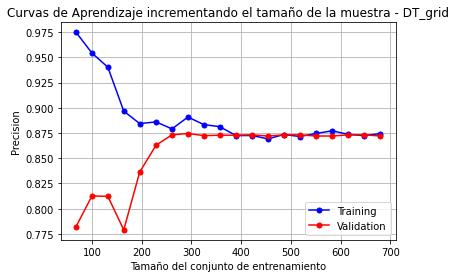

In [ ]:
#d. DECISION TREE - Cruva de aprendizaje con los mejores valores de los hiperparámetros encontrados con la métrica “precision”
delta_train_sz = np.linspace(.1, 1.0, 20)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
DT_grid_res=DecisionTreeClassifier(ccp_alpha=0.03,class_weight= 'balanced',criterion='gini',
                                   max_depth=33, min_samples_split=2)

tr_sizes,tr_scores, val_scores = learning_curve(DT_grid_res,    
                                                        X = Xtrain,
                                                        y = Ytrain,
                                                        cv = cv ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring='precision'
                                                        )
train_mean = np.mean(tr_scores, axis=1)
train_std = np.std(tr_scores, axis=1)
valid_mean = np.mean(val_scores, axis=1)
valid_std = np.std(val_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (F1-Score):
plt.plot(tr_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(tr_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra - DT_grid')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precision')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
#e. Realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). 
#Buscando los mejores hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
modelo_RFi = RandomForestClassifier()

# resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# Xtrain_f,Ytrain_f=resample.fit_resample(Xtrain,Ytrain)


criterion=["gini", "entropy"]
max_depth=np.arange(33,39)
min_samples_split=[2,5]
class_weight=[None,'balanced']
ccp_alpha=np.round(np.linspace(0,0.2,4),2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

grid_modelo_RFi=GridSearchCV(modelo_RFi,param_grid={'criterion':criterion,'max_depth':max_depth,
                                                 'min_samples_split':min_samples_split,'class_weight':class_weight,
                                                 'ccp_alpha':ccp_alpha},cv=cv,scoring='recall')

grid_modelo_RFi.fit(Xtrain_f,Ytrain_f)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': array([0.  , 0.07, 0.13, 0.2 ]),
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([33, 34, 35, 36, 37, 38]),
                         'min_samples_split': [2, 5]},
             scoring='recall')

¿Cuál es la utilidad de la métrica “recall”? 
##Analísis y Conclusiones

* Estamos trabajando con clases desbalanceadas y al usar el recall como métrica para obtener los mejores parámetros esperariamos que con el modelo se compensara el desbalanceo apuntando hacia la clase minoritaria (clientes no aptos para receibir un crédito).

In [ ]:
#e. Impresión de los mejores parámetros
grid_modelo_RFi.best_params_

{'ccp_alpha': 0.07,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 33,
 'min_samples_split': 2}

In [ ]:
rfc=grid_modelo_RFi.predict(Xtest)
print(classification_report(Ytest,rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.70      1.00      0.82       105

    accuracy                           0.70       150
   macro avg       0.35      0.50      0.41       150
weighted avg       0.49      0.70      0.58       150



In [ ]:
print(classification_report_imbalanced(Ytest,rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00        45
          1       0.70      1.00      0.00      0.82      0.00      0.00       105

avg / total       0.49      0.70      0.30      0.58      0.00      0.00       150



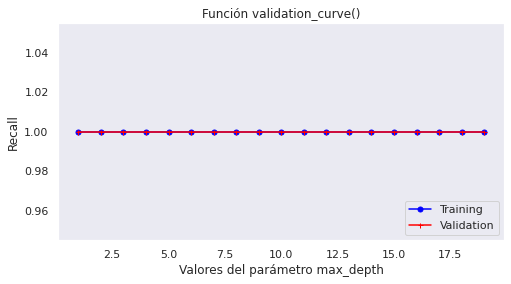

In [ ]:
#f. Curva de validación usando los mejores parámetros, max_depth incrementando 10 valores
delta_C=np.arange(1,20)
Ran_grid_resi=RandomForestClassifier(ccp_alpha=0.07,class_weight=None,criterion='gini',max_depth=33,min_samples_split=2)

train_scores, valid_scores = validation_curve(Ran_grid_resi, 
                                              Xtrain, 
                                              Ytrain,
                                              param_name="max_depth", 
                                              param_range=delta_C,
                                              cv=cv,
                                              scoring='recall')


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='+', markersize=5, label='Validation',)

plt.title('Función validation_curve()')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Recall')
plt.grid()
plt.legend(loc='lower right')
plt.show()

##Analísis y Conclusiones

* En la curva de validación de RandomForest() se puede apreciar que las predicciones del modelo están sesgadas hacia la clase minoritaria (clientes aptos para recibir un crédito), incluso después de obtener los mejores parámetros con la métrica recall el desbalanceo sigue presente razón por la cual proponenos usar la clase BalancedRandomForest() para resolver este ejercicio.

In [ ]:
#e_alt. Realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). 
#Buscando los mejores hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
modelo_RF = BalancedRandomForestClassifier()


criterion=["gini", "entropy"]
max_depth=np.arange(33,39)
min_samples_split=[2,5]
class_weight=[None,'balanced']
ccp_alpha=np.round(np.linspace(0,0.2,4),2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

In [ ]:
grid_modelo_RF=GridSearchCV(modelo_RF,param_grid={'criterion':criterion,'max_depth':max_depth,
                                                 'min_samples_split':min_samples_split,'class_weight':class_weight,
                                                 'ccp_alpha':ccp_alpha},cv=cv,scoring='recall')

grid_modelo_RF.fit(Xtrain,Ytrain)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=BalancedRandomForestClassifier(),
             param_grid={'ccp_alpha': array([0.  , 0.07, 0.13, 0.2 ]),
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([33, 34, 35, 36, 37, 38]),
                         'min_samples_split': [2, 5]},
             scoring='recall')

Cuál es la utilidad de la métrica Recall? **R. Favorece la obtención de los mejores parámetros en base a la clase minoritaria (VP y FN) entonces esperamos que usando esta métrica se pueda compensar el desbalanceo al calcular los parámetros con Gridsearch. Un recall de cero será indicativo de que hay que aplicar técnicas de balanceo adicionales.***

In [ ]:
#e. Impresión de los mejores parámetros
grid_modelo_RF.best_params_


{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 36,
 'min_samples_split': 2}

In [ ]:
rfc=grid_modelo_RF.predict(Xtest)
print(classification_report(Ytest,rfc))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60        45
           1       0.82      0.87      0.84       105

    accuracy                           0.77       150
   macro avg       0.73      0.71      0.72       150
weighted avg       0.77      0.77      0.77       150



In [ ]:
print(classification_report_imbalanced(Ytest,rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.64      0.56      0.87      0.60      0.69      0.47        45
          1       0.82      0.87      0.56      0.84      0.69      0.50       105

avg / total       0.77      0.77      0.65      0.77      0.69      0.49       150



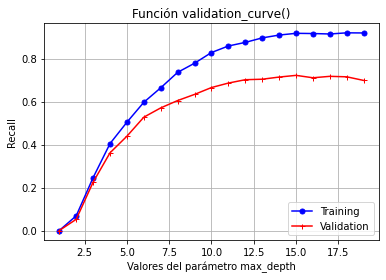

In [46]:
#f. Curva de validación usando los mejores parámetros, max_depth incrementando 10 valores
delta_C=np.arange(1,20)
Ran_grid_res=BalancedRandomForestClassifier(ccp_alpha=0.0,class_weight='balanced',criterion='gini',max_depth=36,min_samples_split=2,n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_scores, valid_scores = validation_curve(Ran_grid_res, 
                                              Xtrain, 
                                              Ytrain,
                                              param_name="max_depth", 
                                              param_range=delta_C,
                                              cv=cv,
                                              scoring='recall')


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='+', markersize=5, label='Validation',)

plt.title('Función validation_curve()')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Recall')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#**Ejercicio-6.**

a. Obtener el modelo de regresión logística con los mejores parámetros que hayas
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final
obtenido. 


In [ ]:
modelo_LR_Final = LogisticRegression(max_iter=8000,
                            C=1.0,
                            solver='newton-cg',
                            class_weight=None,
                            penalty='l2',
                            random_state=0)


Xtrain_Fit = Columnas_Transformar.fit(Xtrain)
Xtrain_Transf = Xtrain_Fit.transform(Xtrain)
XTest_Transf  =  Xtrain_Fit.transform(Xtest)
modelo_LR_Final.fit(Xtrain_Transf, np.ravel(Ytrain))

print("Mejor valor de F1 Score del modelo de Regresion Logistica:", modelo_LR_Final.score(XTest_Transf, np.ravel(Ytest)))

#{'C': 1.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}

Mejor valor de F1 Score del modelo de Regresion Logistica: 0.7466666666666667


##Analísis y Conclusiones

* Después de encontrar los mejores parámetros para el modelo de regresión logístcica el resultado de la métrica f1-score fue de 0.76, con el conjunto de prueba el resultado de la métrica es ~0.75 lo que demuestra que el modelo esta generalizando correctamente utilizando los datos del conjunto de prueba.

b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas
encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e
incluye tus conclusiones finales para este caso. 


In [21]:
from sklearn.tree import plot_tree
from sklearn import tree
import pydotplus 
from IPython.display import Image

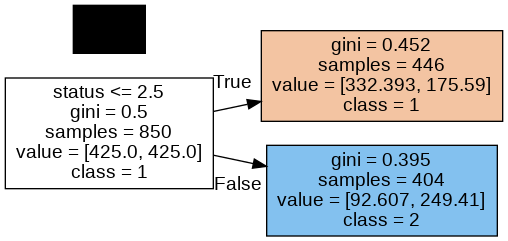

In [43]:

DT_grid_res=DecisionTreeClassifier(ccp_alpha=0.03,class_weight= 'balanced',criterion='gini',
                                   max_depth=33, min_samples_split=2)

DT_grid_res.fit(Xtrain,np.ravel(Ytrain))
DTf_pred = DT_grid_res.predict(Xtest)


dot_data = tree.export_graphviz(decision_tree=DT_grid_res.fit(Xtrain,np.ravel(Ytrain)), 
                                out_file=None,
                                max_depth=None,
                                feature_names=list(pd.DataFrame(Xtrain).columns.values),
                                class_names=['1','2','3','4'],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# plt.figure(figsize=(12,8),dpi=150)
# plot_tree(DT_grid_res,filled=True,feature_names=X.columns)
# class_names=[Y[0],Y[1]]
# print("Mejor valor de precisión del modelo de Árbol de Decisión:", mi_precision(Ytest, DTf_pred))



In [42]:
print("Mejor valor de precisión del modelo de Árbol de Decisión:", mi_precision(Ytest, DTf_pred))

Mejor valor de precisión del modelo de Árbol de Decisión: 0.9245283018867925


##Analísis y Conclusiones

* La característica de mayor importancia es "status" lo cual tiene sentido pues este está relacionado con un buen manejo de la cuenta. El valor de gini de 0.395 que se presenta una mayor homogeneidad para los datos con clase 1, ya que el factor de comparación del atributo más imporante categorizo 404 muestras hacia esta última rama del arbol. Se muestra una precisión muy alta pero el modelo deja de producir niveles aún cuando los "ginis" podrian reducirse más. Este modelo no es confiable y seria más conveniente buscar otro modelo alternativo.

c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. 

In [ ]:
Ran_grid_res=BalancedRandomForestClassifier(ccp_alpha=0.0,class_weight='balanced',criterion='gini',max_depth=36,min_samples_split=2,n_jobs=-1)
Ran_grid_res.fit(Xtrain,Ytrain)
Forest_Final = Ran_grid_res.predict(Xtest)

print("Mejor valor de recall del modelo de Bosque Aleatorio:", mi_recall(Ytest, Forest_Final))

Mejor valor de recall del modelo de Bosque Aleatorio: 0.801980198019802


##Analísis y Conclusiones

* Llegamos a este útlimo modelo (BalancedRandomForest) después de procesar un RandomForest que aun combinando técnica de muestreo genera un recall poco confiable. Como se puede observar en la sección 5 la curva de validación del modelo BalancedRandomForest presenta un comportamiento aceptable con una varianza de alrededor del 20% y una métrica de desempeño creciente en el conjunto de validación.

###**Fin de la Actividad de la semana 6.**